# Insurance Claims- Fraud Detection

## Problem Statement:

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

## Importing the required libraries:

In [1206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder,StandardScaler,power_transform,MinMaxScaler,PowerTransformer,OrdinalEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from scipy.stats import boxcox
from scipy.stats import zscore
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset:

In [1207]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [1208]:
df['_c39'].isnull().sum()

1000

## EDA (Exploratory Data Analysis):

In [1209]:
df.shape

(1000, 40)

We have 1000 rows and 40 columns including target variable in this dataset

In [1210]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

fraud_reported is our target column, Rest are independent columns

In [1211]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

we have many object datatypes columns in this dataset

In [1212]:
#lets check for null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [1213]:
#There are no null values in this dataset, except this column _c39 which is having all null valuese
#we can drop this column since all the rows are null
df.drop('_c39',axis = 1,inplace = True)

In [1214]:
#we have dropped this column
df.shape

(1000, 39)

## Data Visulization

### Univariate Analysis :

### Lets check for class imbalance problem

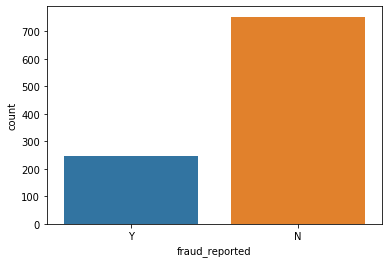

In [1215]:
#lets check our traget variable for class imbalance problem
sns.countplot(x="fraud_reported",data=df)
plt.show()

From the above plot we can see there is a class imbalance problem in this dataset

In [1216]:
df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

We 753 rows where is no fraud reported and there are 247 cases where fraud is reported

### Bivariate Analysis with Target Variable

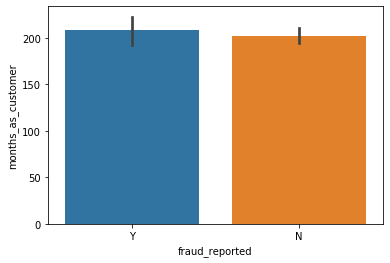

In [1217]:
#Lets check this column againt our target variable
sns.barplot(x = 'fraud_reported' , y ='months_as_customer', data = df )
plt.show()

In [1218]:
df.groupby('fraud_reported')['months_as_customer'].mean()

fraud_reported
N    202.600266
Y    208.080972
Name: months_as_customer, dtype: float64

In [1219]:
#From the above plot we can see that both Yes and No are in equal
#so we can saw that fraud can done by both old and new costomers
#it doesn't depend on it

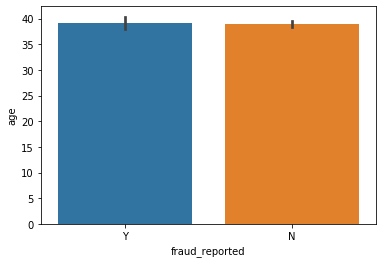

In [1220]:
#Lets check this column againt our target variable
sns.barplot(x = 'fraud_reported' , y ='age', data = df )
plt.show()

In [1221]:
df.groupby('fraud_reported')['age'].mean()

fraud_reported
N    38.884462
Y    39.141700
Name: age, dtype: float64

In [1222]:
#From the above plot we can see that both Yes and No are in equal
#so we can saw that fraud can done by both all the age groped people
#it doesn't depend on it

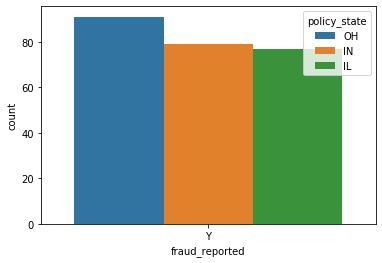

In [1223]:
#Lets check this column againt our target variable
sns.countplot(x = 'fraud_reported' , hue ='policy_state', data = df.loc[df['fraud_reported'] == 'Y'] )
plt.show()

From the above plot we can see that people whose policy state is 'OH' has fraud reported many times

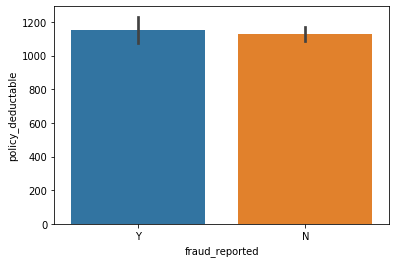

In [1224]:
#Lets check this column againt our target variable
sns.barplot(x = 'fraud_reported' , y ='policy_deductable', data = df )
plt.show()

In [1225]:
df.groupby('fraud_reported')['policy_deductable'].mean()

fraud_reported
N    1130.810093
Y    1151.821862
Name: policy_deductable, dtype: float64

In [1226]:
#From the above plot we can see that both Yes and No are in equal
#so we can saw that fraud can done by both whose deductable amount is high as well as low.
#it doesn't depend on it

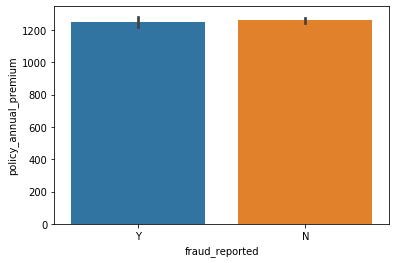

In [1227]:
#Lets check this column againt our target variable
sns.barplot(x = 'fraud_reported' , y ='policy_annual_premium', data = df )
plt.show()

In [1228]:
df.groupby('fraud_reported')['policy_annual_premium'].mean()

fraud_reported
N    1258.430000
Y    1250.236275
Name: policy_annual_premium, dtype: float64

In [1229]:
#From the above plot we can see that both Yes and No are in equal
#so we can saw that fraud can done by both whose policy annual premium amount is high as well as low.
#it doesn't depend on it

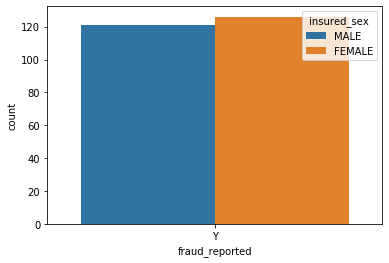

In [1230]:
#Lets check this column againt our target variable
sns.countplot(x = 'fraud_reported' , hue ='insured_sex', data = df.loc[df['fraud_reported'] == 'Y'] )
plt.show()

In [1231]:
#From the above plot we can see that both male and femael are in almost equal ratio who commited fraud

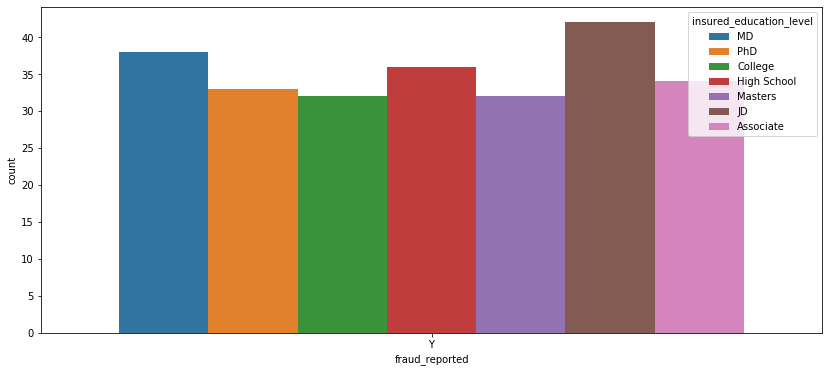

In [1232]:
#Lets check this column againt our target variable
plt.figure(figsize= (14,6))
sns.countplot(x = 'fraud_reported' , hue ='insured_education_level', data = df.loc[df['fraud_reported'] == 'Y'] )
plt.show()

In [1233]:
#from the above plot we can see that people who complted jD as education are quite high who commited the fraud

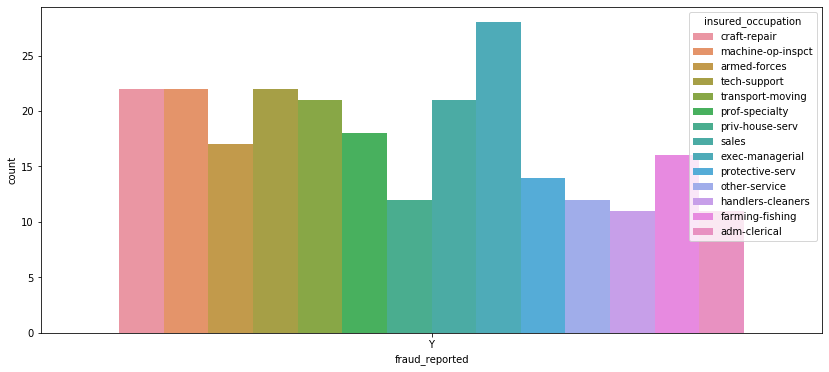

In [1234]:
#Lets check this column againt our target variable
plt.figure(figsize= (14,6))
sns.countplot(x = 'fraud_reported' , hue ='insured_occupation', data = df.loc[df['fraud_reported'] == 'Y'] )
plt.show()

In [1235]:
#From the above ploe we can tell that people in  exex-managerial job has commited fraud most number of times

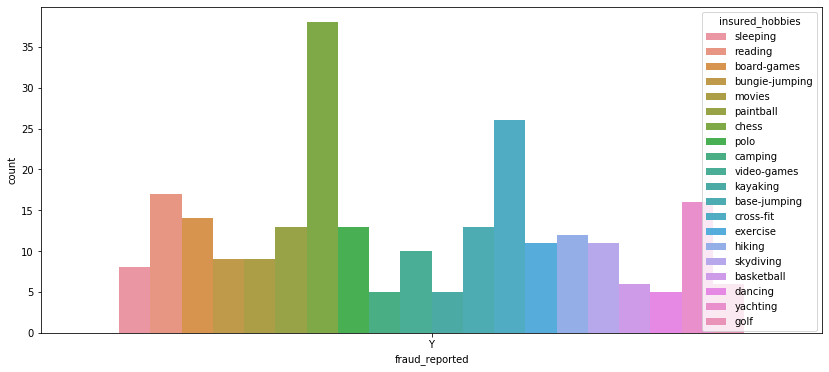

In [1236]:
#Lets check this column againt our target variable
plt.figure(figsize= (14,6))
sns.countplot(x = 'fraud_reported' , hue ='insured_hobbies', data = df.loc[df['fraud_reported'] == 'Y'] )
plt.show()

In [1237]:
#From the above plot we can tell that people who plays chess has hobby has the probablity of committing fraud many times

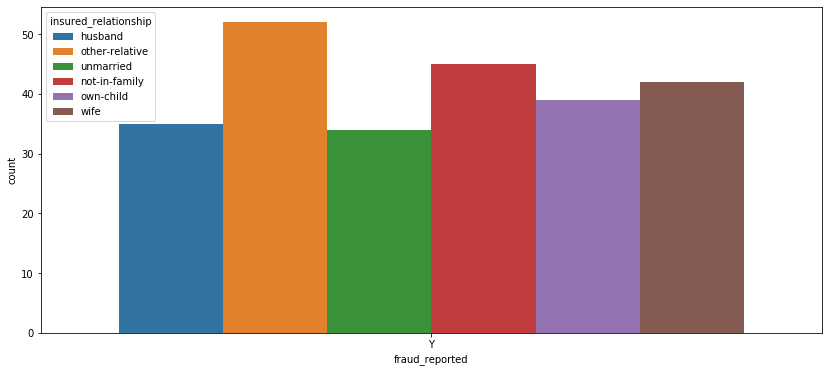

In [1238]:
#Lets check this column againt our target variable
plt.figure(figsize= (14,6))
sns.countplot(x = 'fraud_reported' , hue ='insured_relationship', data = df.loc[df['fraud_reported'] == 'Y'] )
plt.show()

In [1239]:
# From the above plot we can see that other relative has comitted many fraud compare to other realationship

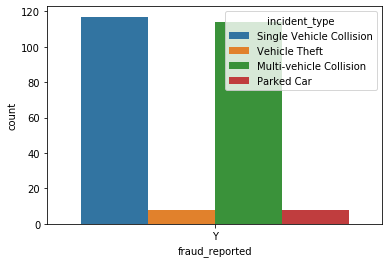

In [1240]:
#Lets check this column againt our target variable
#plt.figure(figsize= (14,6))
sns.countplot(x = 'fraud_reported' , hue ='incident_type', data = df.loc[df['fraud_reported'] == 'Y'] )
plt.show()

In [1241]:
# From the above plot we can see that Most of frauds are done by people stating single vehicle and multi-vehicle collision

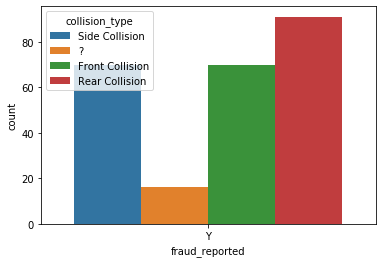

In [1242]:
#Lets check this column againt our target variable
#plt.figure(figsize= (14,6))
sns.countplot(x = 'fraud_reported' , hue ='collision_type', data = df.loc[df['fraud_reported'] == 'Y'] )
plt.show()

In [1243]:
# From the above plot we can see that Most of frauds are reported when customer state it is a rear collision

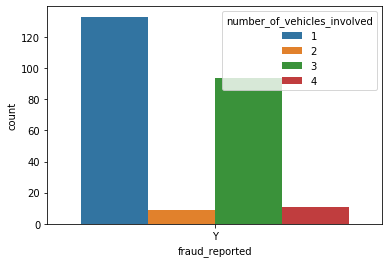

In [1244]:
#Lets check this column againt our target variable
#plt.figure(figsize= (14,6))
sns.countplot(x = 'fraud_reported' , hue ='number_of_vehicles_involved', data = df.loc[df['fraud_reported'] == 'Y'] )
plt.show()

In [1245]:
# From the above plot we can see that Most of frauds are reported when customer state it is a number of vehicle involved is only 1.

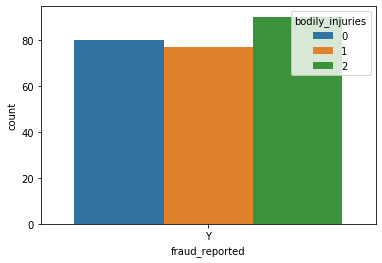

In [1246]:
#Lets check this column againt our target variable
#plt.figure(figsize= (14,6))
sns.countplot(x = 'fraud_reported' , hue ='bodily_injuries', data = df.loc[df['fraud_reported'] == 'Y'] )
plt.show()

In [1247]:
# From the above plot we can see that Most are frauds are reported when bodily injuries are equal to 2

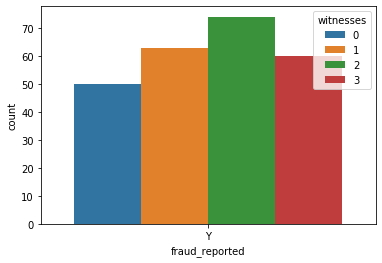

In [1248]:
#Lets check this column againt our target variable
#plt.figure(figsize= (14,6))
sns.countplot(x = 'fraud_reported' , hue ='witnesses', data = df.loc[df['fraud_reported'] == 'Y'] )
plt.show()

In [1249]:
# From the above plot we can see that Most are frauds are reported when witnesses are equal to 2

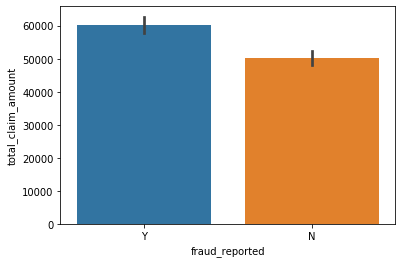

In [1250]:
#Lets check this column againt our target variable
sns.barplot(x = 'fraud_reported' , y ='total_claim_amount', data = df )
plt.show()

In [1251]:
df.groupby('fraud_reported')['total_claim_amount'].mean()

fraud_reported
N    50288.605578
Y    60302.105263
Name: total_claim_amount, dtype: float64

In [1252]:
# From the above plot we can see that Most of the frauds are reported when total claim amount is high

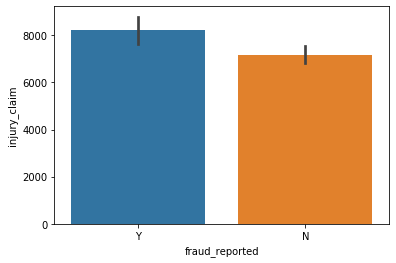

In [1253]:
#Lets check this column againt our target variable
sns.barplot(x = 'fraud_reported' , y ='injury_claim', data = df )
plt.show()

In [1254]:
df.groupby('fraud_reported')['injury_claim'].mean()

fraud_reported
N    7179.229748
Y    8208.340081
Name: injury_claim, dtype: float64

In [1255]:
# From the above plot we can see that Most of the frauds are reported when Injury claim amount is high

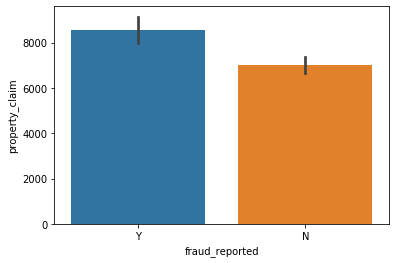

In [1256]:
#Lets check this column againt our target variable
sns.barplot(x = 'fraud_reported' , y ='property_claim', data = df )
plt.show()

In [1257]:
df.groupby('fraud_reported')['property_claim'].mean()

fraud_reported
N    7018.884462
Y    8560.121457
Name: property_claim, dtype: float64

In [1258]:
# From the above plot we can see that Most of the frauds are reported when property claim amount is high

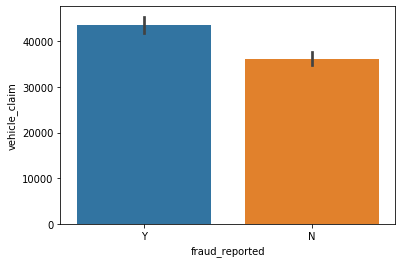

In [1259]:
#Lets check this column againt our target variable
sns.barplot(x = 'fraud_reported' , y ='vehicle_claim', data = df )
plt.show()

In [1260]:
df.groupby('fraud_reported')['vehicle_claim'].mean()

fraud_reported
N    36090.491368
Y    43533.643725
Name: vehicle_claim, dtype: float64

In [1261]:
# From the above plot we can see that Most of the frauds are reported when vehicle claim amount is high

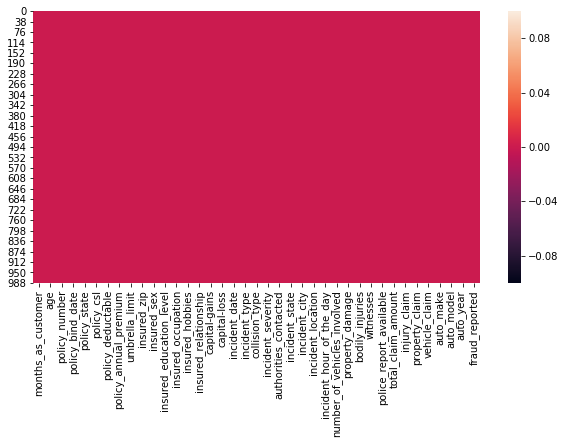

In [1262]:
#checking the missing values with visualization technique
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

In [1263]:
#From the above plot we can see that there are no missing values in this dataset

## Lets check the number of unique values in object column

In [1264]:
#lets print out the columns with unique values
for i in df.columns:
    if df[i].dtype == 'object':
        print(i,len(pd.unique(df[i])))

policy_bind_date 951
policy_state 3
policy_csl 3
insured_sex 2
insured_education_level 7
insured_occupation 14
insured_hobbies 20
insured_relationship 6
incident_date 60
incident_type 4
collision_type 4
incident_severity 4
authorities_contacted 5
incident_state 7
incident_city 7
incident_location 1000
property_damage 3
police_report_available 3
auto_make 14
auto_model 39
fraud_reported 2


In [1265]:
#lets print out the columns with unique values
for i in df.columns:
    if df[i].dtype == 'object':
        print('\n')
        print(i,df[i].value_counts())



policy_bind_date 28-04-1992    3
01-01-2006    3
05-08-1992    3
21-09-2005    2
04-05-2000    2
             ..
03-01-2015    1
20-01-1996    1
20-09-1999    1
05-08-2006    1
19-09-1991    1
Name: policy_bind_date, Length: 951, dtype: int64


policy_state OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


policy_csl 250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


insured_sex FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


insured_education_level JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


insured_occupation machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63

## Data Preprocessing

### Dropping Unnessary Columns:

In [1266]:
#dropping these columns
df.drop(['policy_number','incident_location'],axis = 1, inplace = True)

In [1267]:
df.shape

(1000, 37)

## Feature Engineering

In [1268]:
#lets check the datatype
df.policy_bind_date.dtype

dtype('O')

In [1269]:
#lets check the datatype
df.incident_date.dtype

dtype('O')

Both the columns are object datatype, first lets convert them to date datatype

In [1270]:
#coverting this column to date
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'],format= '%d-%m-%Y')

In [1271]:
#coverting this column to date
df['incident_date'] = pd.to_datetime(df['incident_date'],format= '%d-%m-%Y')

In [1272]:
#Lets create new column which is days between policy bind and incident date
df['days_bw_pocilybind_and_incident'] = df['incident_date'] - df['policy_bind_date']

In [1273]:
#we got this column 
df['days_bw_pocilybind_and_incident'][3].days

8996

In [1274]:
#lets see all three columns
df.loc[:,['incident_date','policy_bind_date','days_bw_pocilybind_and_incident']]

,incident_date,policy_bind_date,days_bw_pocilybind_and_incident
0,2015-01-25,2014-10-17,100 days
1,2015-01-21,2006-06-27,3130 days
2,2015-02-22,2000-09-06,5282 days
3,2015-01-10,1990-05-25,8996 days
4,2015-02-17,2014-06-06,256 days
...,...,...,...
995,2015-02-22,1991-07-16,8622 days
996,2015-01-24,2014-01-05,384 days
997,2015-01-23,2003-02-17,4358 days
998,2015-02-26,2011-11-18,1196 days


In [1275]:
#lets check for null values in the new column
df.days_bw_pocilybind_and_incident.isnull().sum()

0

In [1276]:
#lets extract the numerical information form this column
for i in range(len(df.days_bw_pocilybind_and_incident)):
    df['days_bw_pocilybind_and_incident'][i] = df['days_bw_pocilybind_and_incident'][i].days

In [1277]:
#converting it into float
df['days_bw_pocilybind_and_incident'] = df['days_bw_pocilybind_and_incident'].astype(float)

In [1278]:
df['days_bw_pocilybind_and_incident'].dtype

dtype('float64')

In [1279]:
df.days_bw_pocilybind_and_incident.head()

0     100.0
1    3130.0
2    5282.0
3    8996.0
4     256.0
Name: days_bw_pocilybind_and_incident, dtype: float64

In [1280]:
#now we have got useful information form policy_bind_date and incident_date  column
#lets drop these columns now
df.drop(['policy_bind_date','incident_date'],axis = 1, inplace = True)

In [1281]:
#we can also drop zipcode column which is not of any use for target prediction
df.drop('insured_zip',axis = 1, inplace = True)

In [1282]:
#we can also drop umbrella limit column since 800 rows are 0 among 1000 rows
df.umbrella_limit.unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [1283]:
#80% of data is zero
df.umbrella_limit.value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [1284]:
#so lets drop this column
df.drop('umbrella_limit',axis = 1,inplace = True)

In [1285]:
df.loc[df['police_report_available']== '?'].head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,days_bw_pocilybind_and_incident
1,228,42,IN,250/500,2000,1197.22,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,3130.0
6,137,34,IN,250/500,1000,1333.35,MALE,PhD,prof-specialty,board-games,husband,0,-77000,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,5336.0
9,212,42,IL,100/300,500,1315.68,MALE,PhD,priv-house-serv,camping,wife,0,-39300,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N,1260.0
10,235,42,OH,100/300,500,1253.12,FEMALE,Masters,exec-managerial,dancing,other-relative,38400,0,Single Vehicle Collision,Front Collision,Total Loss,Police,NY,Northbend,22,1,YES,2,2,?,87010,7910,15820,63280,Ford,F150,2002,N,4608.0
20,460,62,IN,250/500,1000,1187.96,MALE,JD,other-service,bungie-jumping,own-child,0,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,20,3,NO,1,0,?,47160,0,5240,41920,Suburu,Impreza,2011,N,4573.0


In [1286]:
#we can see ? symbol in  1:3 ratio in this column
df.police_report_available.value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [1287]:
#we can see ? symbol in  1:4 ratio in this column
df.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [1288]:
#we can see ? symbol in  1:3 ratio in this column
df.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [1289]:
#lets create a list
column_with_question_mark_symbol = ['police_report_available','collision_type','property_damage']

In [1290]:
#lets replace '?' with nan values
for i in range(len(column_with_question_mark_symbol)):
    df[column_with_question_mark_symbol[i]].replace('?',np.nan,inplace= True)

In [1291]:
#Now the '?' are replaced with the nan values in all the columns
for i in column_with_question_mark_symbol:
    print(i, df[i].isnull().sum())

police_report_available 343
collision_type 178
property_damage 360


In [1292]:
#lets replace the nan values for all the columns with mode of the same target variable 
for i in df.columns:
    if df[i].dtype=="object" and df[i].isnull().sum()>0:
        df.loc[df["fraud_reported"]=="Y",[i]]=df.loc[df["fraud_reported"]=="Y",[i]].fillna(df.loc[df["fraud_reported"]=="Y",[i]].mode().iloc[0])
        df.loc[df["fraud_reported"]=="N",[i]]=df.loc[df["fraud_reported"]=="N",[i]].fillna(df.loc[df["fraud_reported"]=="N",[i]].mode().iloc[0])

In [1293]:
#now lets check the value count
for i in column_with_question_mark_symbol:
    print(i,df[i].value_counts())

police_report_available NO     686
YES    314
Name: police_report_available, dtype: int64
collision_type Side Collision     438
Rear Collision     308
Front Collision    254
Name: collision_type, dtype: int64
property_damage NO     595
YES    405
Name: property_damage, dtype: int64


Now our '?' problem has been resolved

### Coverting some columns from int to object datatype

In [1294]:
#lets check the unique values in each columns
int_to_object = ['number_of_vehicles_involved','bodily_injuries','witnesses']
for i in int_to_object:
    print(df[i].value_counts())

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64
0    340
2    332
1    328
Name: bodily_injuries, dtype: int64
1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


In [1295]:
#we can see that these columns consists of 3 and 4 unique values, lets covert it into onject datatypes
int_to_object = ['number_of_vehicles_involved','bodily_injuries','witnesses']
for i in int_to_object:
    df[i] = df[i].astype('object')

In [1296]:
#now they are converted into object datatype, lets check it out
int_to_object = ['number_of_vehicles_involved','bodily_injuries','witnesses']
for i in int_to_object:
    print(i,df[i].dtype)

number_of_vehicles_involved object
bodily_injuries object
witnesses object


In [1297]:
#lets print out the columns with unique values
for i in df.columns:
    if df[i].dtype == 'object':
        print(i,len(pd.unique(df[i])))

policy_state 3
policy_csl 3
insured_sex 2
insured_education_level 7
insured_occupation 14
insured_hobbies 20
insured_relationship 6
incident_type 4
collision_type 3
incident_severity 4
authorities_contacted 5
incident_state 7
incident_city 7
number_of_vehicles_involved 4
property_damage 2
bodily_injuries 3
witnesses 4
police_report_available 2
auto_make 14
auto_model 39
fraud_reported 2


In [1298]:
#we can drop auto_model column since this column is object datatype and also it has 39 unique values
#also this column is very much less correlated with the target varibale
df.drop('auto_model',axis =1,inplace = True)

### Outlier Removal for Numerical Columns

In [1299]:
Numerical_columns = []
for i in df.columns:
    if df[i].dtype != 'object':
        Numerical_columns.append(i)
Numerical_columns

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'days_bw_pocilybind_and_incident']

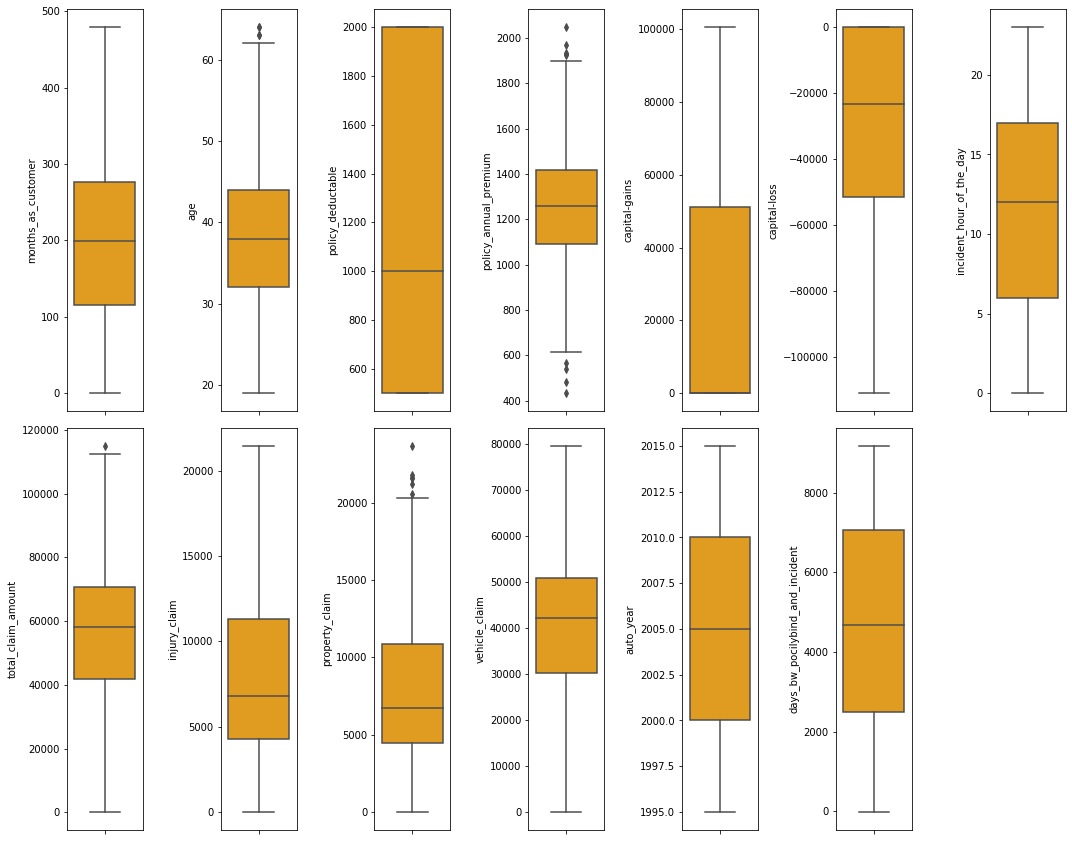

In [1300]:
# lets check for outliers among all the columns Numerical columns
collist = Numerical_columns
ncol = 7
nrows = 6
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='orange',orient = 'v')
    plt.tight_layout()

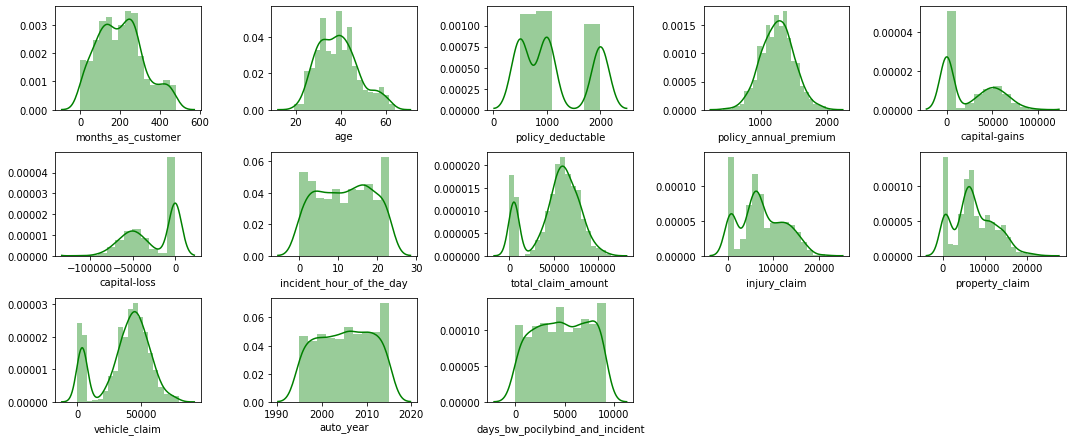

In [1301]:
# Lets check the distribution
collist = Numerical_columns
ncol = 5
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

We can see almost 90% of the columns are normal distributed

In [1302]:
#Function of outlier Removal when data is not normal distributed or Right skewed
def outliers_IQR3(data_frame,feature_name):
    IQR  =data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_boundary = data_frame[feature_name].quantile(0.25) - (IQR * 1.5)
    upper_boundary = data_frame[feature_name].quantile(0.75) + (IQR * 1.5)
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [1303]:
##Function of outlier Removal when data looks like normal distributed.
def outliers_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [1304]:
#lets remove the outliers
for i in Numerical_columns:
    outliers_IQR3(df,i)

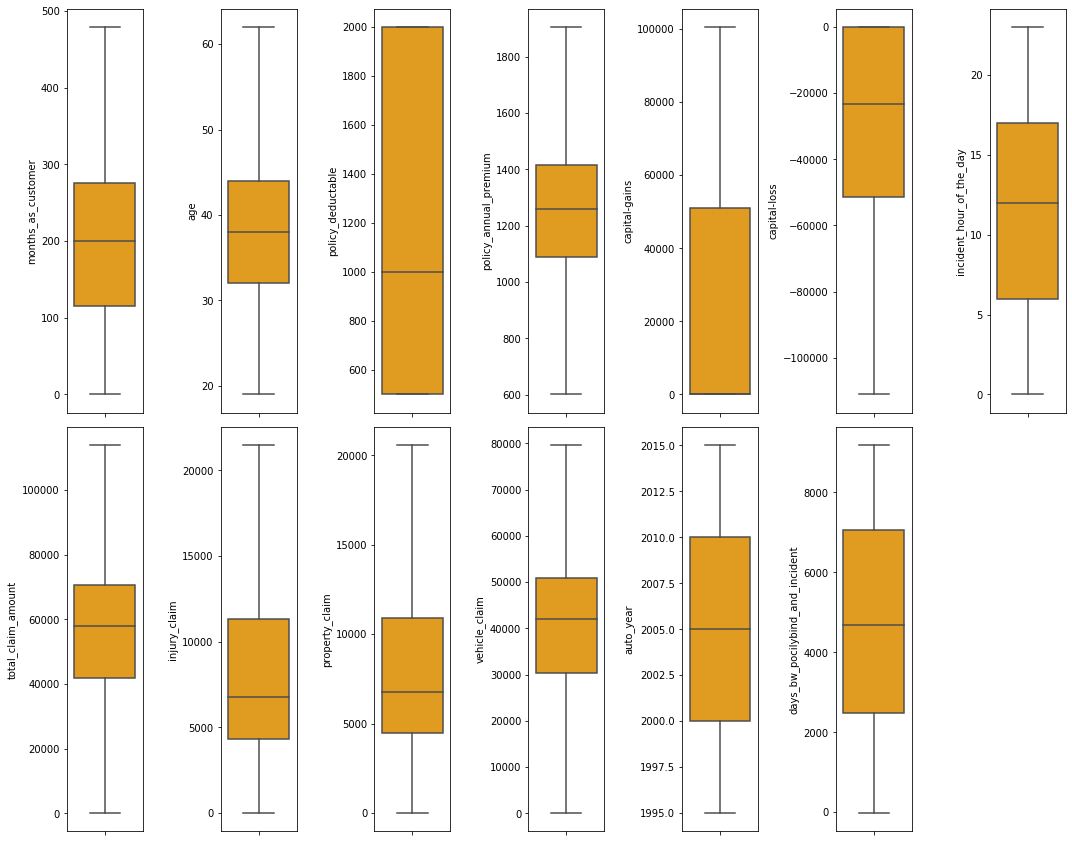

In [1305]:
# lets check for outliers among all the columns Numerical columns
collist = Numerical_columns
ncol = 7
nrows = 6
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='orange',orient = 'v')
    plt.tight_layout()

In [1306]:
#now the outliers have been compltetly removed

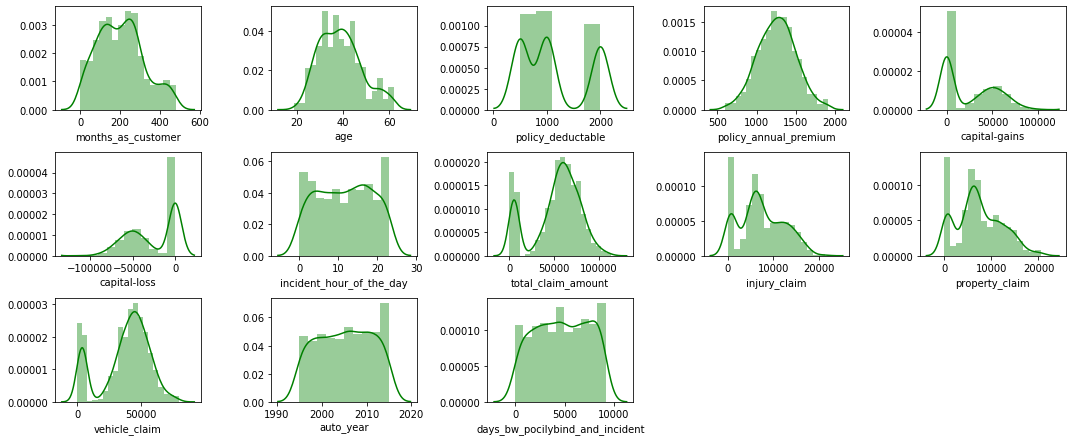

In [1307]:
# Lets check the distribution
collist = Numerical_columns
ncol = 5
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

In [1308]:
#we can see that after outlier removal columns are normal distributed

## Skewness Reduction

In [1309]:
#Lest check the skewness of these numerical columns
for i in Numerical_columns:
    if (df[i].skew() > 0.5 ) or (df[i].skew() < -0.5) :
        print(i, df[i].skew())

total_claim_amount -0.5953507359843401
vehicle_claim -0.6210979312228687


In [1310]:
#we can see that only 2 numericals columns are having skewness,
#which are not very close to skewness range -0.5 to +0.5

In [1311]:
#lets remove the skesness of these columns
df['total_claim_amount'] = power_transform(df['total_claim_amount'].values.reshape(-1,1))
df['vehicle_claim'] = power_transform(df['vehicle_claim'].values.reshape(-1,1))

skewness is now reduced

## Enoding The Target column

In [1312]:
#first lets encode our target variable
df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [1313]:
#function to convert our target variable
def label(x):
    if x == 'Y':
        return 1
    else:
        return 0

In [1314]:
#Lets apply the above function
df['fraud_reported'] = df['fraud_reported'].apply(label)

In [1315]:
#lets verify
df.fraud_reported.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [1316]:
#beforing encoding other columns lets check statistical summary and correlation of target column with numerical columns

In [1317]:
#statistical summary or descriptive analysis
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,days_bw_pocilybind_and_incident
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,203.954000,38.942000,1136.000000,1256.506126,25126.100000,-26793.700000,11.644000,-1.967315e-16,7433.420000,7392.360000,2.216005e-16,2005.103000,0.247000,4739.140000
std,115.113174,9.124576,611.864673,242.246335,27872.187708,28104.096686,6.951373,1.000500e+00,4880.951853,4803.547892,1.000500e+00,6.015861,0.431483,2686.430702
min,0.000000,19.000000,500.000000,600.476250,0.000000,-111100.000000,0.000000,-1.928968e+00,0.000000,0.000000,-1.927542e+00,1995.000000,0.000000,-20.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000,-51500.000000,6.000000,-4.456059e-01,4295.000000,4445.000000,-4.408923e-01,2000.000000,0.000000,2484.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000,-23250.000000,12.000000,1.819109e-01,6775.000000,6750.000000,1.996285e-01,2005.000000,0.000000,4682.000000
75%,276.250000,44.000000,2000.000000,1415.695000,51025.000000,0.000000,17.000000,6.754915e-01,11305.000000,10885.000000,6.833312e-01,2010.000000,0.000000,7068.000000
max,479.000000,62.000000,2000.000000,1904.826250,100500.000000,0.000000,23.000000,2.419691e+00,21450.000000,20545.000000,2.323867e+00,2015.000000,1.000000,9172.000000


Insights obtained from above Table :

The difference between 75th percentile and max is not much, So there is presence of less outliers

Standard Deviation is also very less for all the columns expect target variable , Means the data is less spreaded

Mean and median is almost same for every column, so the data almost normal distibuted

There are no null values in any columns

In [1318]:
#lets check for correlation among all the columns
df.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,days_bw_pocilybind_and_incident
months_as_customer,1.000000,0.922143,0.026807,0.003913,0.006399,0.020209,0.070639,0.062404,0.065329,0.037080,0.061308,-0.000292,0.020544,0.047927
age,0.922143,1.000000,0.029832,0.013780,-0.007150,0.006753,0.087278,0.070653,0.075887,0.062858,0.063059,0.001513,0.012287,0.037033
policy_deductable,0.026807,0.029832,1.000000,-0.003331,0.035212,-0.023544,0.060935,0.023288,0.039107,0.065553,0.004875,0.026105,0.014817,0.050396
policy_annual_premium,0.003913,0.013780,-0.003331,1.000000,-0.012984,0.024453,-0.001393,0.006227,-0.019397,-0.011577,0.017740,-0.046996,-0.014240,-0.001160
capital-gains,0.006399,-0.007150,0.035212,-0.012984,1.000000,-0.046904,-0.016406,0.015251,0.025934,-0.001322,0.014891,0.031398,-0.019173,-0.042226
capital-loss,0.020209,0.006753,-0.023544,0.024453,-0.046904,1.000000,-0.025054,-0.036660,-0.046060,-0.023274,-0.033303,-0.056615,-0.014863,0.027647
incident_hour_of_the_day,0.070639,0.087278,0.060935,-0.001393,-0.016406,-0.025054,1.000000,0.214263,0.165768,0.179720,0.211365,0.021368,0.004316,-0.035873
total_claim_amount,0.062404,0.070653,0.023288,0.006227,0.015251,-0.036660,0.214263,1.000000,0.806390,0.813873,0.981220,-0.035807,0.161904,0.000824
injury_claim,0.065329,0.075887,0.039107,-0.019397,0.025934,-0.046060,0.165768,0.806390,1.000000,0.565837,0.720711,-0.013718,0.090975,-0.002487
property_claim,0.037080,0.062858,0.065553,-0.011577,-0.001322,-0.023274,0.179720,0.813873,0.565837,1.000000,0.732056,-0.013521,0.138192,-0.000546


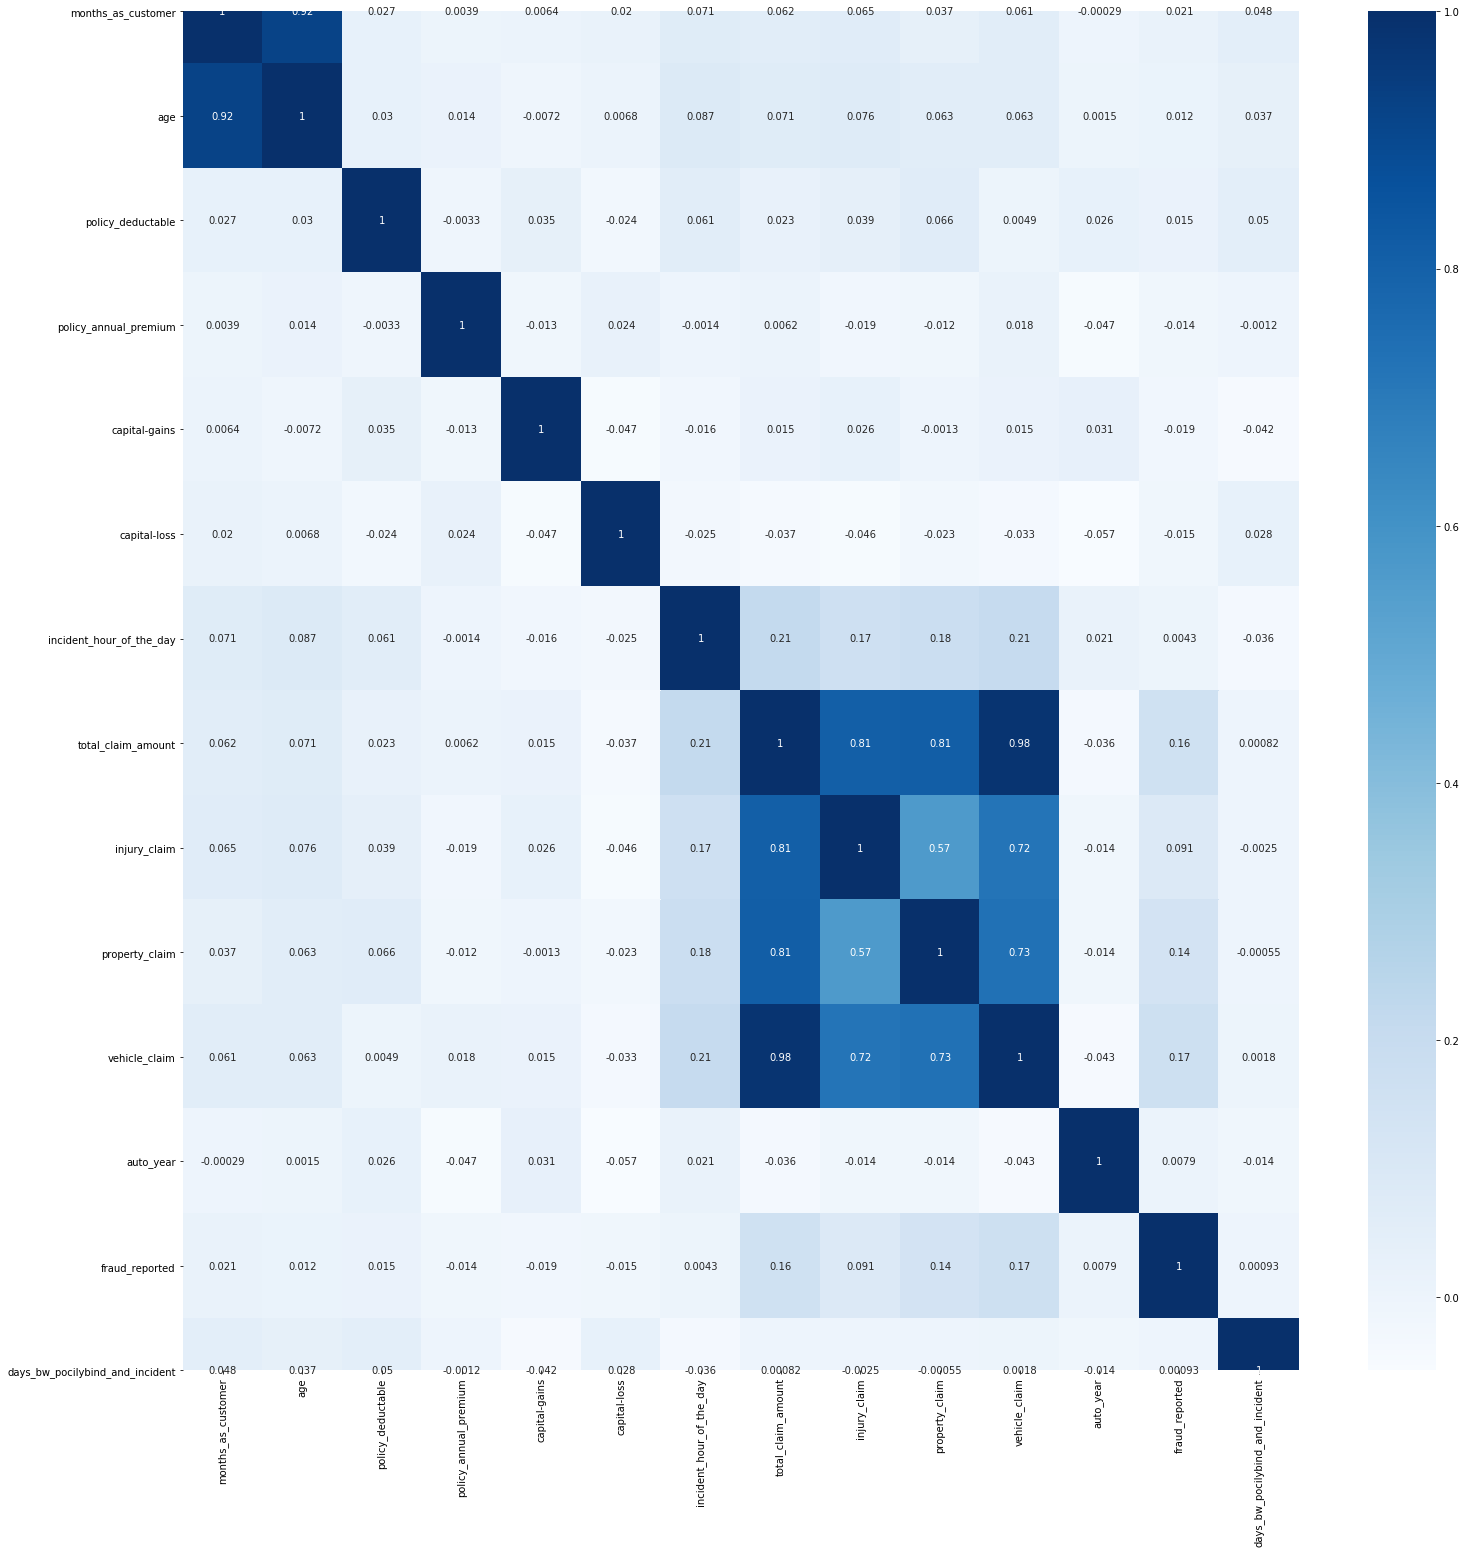

In [1319]:
#correlation
fig = plt.figure(figsize=(25,25))
cor_matrix = df.corr(method='pearson')
sns.heatmap(cor_matrix,annot = True,cmap = 'Blues')
plt.show()

In [1320]:
#lets check for the correlation of input columns with Target Variable
cor_matrix['fraud_reported'].sort_values(ascending = False)

fraud_reported                     1.000000
vehicle_claim                      0.168249
total_claim_amount                 0.161904
property_claim                     0.138192
injury_claim                       0.090975
months_as_customer                 0.020544
policy_deductable                  0.014817
age                                0.012287
auto_year                          0.007928
incident_hour_of_the_day           0.004316
days_bw_pocilybind_and_incident    0.000930
policy_annual_premium             -0.014240
capital-loss                      -0.014863
capital-gains                     -0.019173
Name: fraud_reported, dtype: float64

In [1321]:
#from the above table we can see that no column is having good correlation target variable

In [1322]:
#lets convert object columns with two unique values using ordinal encoding
for i in df.columns:
    if  (df[i].dtypes == 'object') and (len(df[i].unique()) == 2):
        print(i)

insured_sex
property_damage
police_report_available


In [1323]:
#lets convert above 4 object columns with two unique values using ordinal encoding
o_encoding = OrdinalEncoder()
for i in df.columns:
    if (df[i].dtypes == 'object') and (len(df[i].unique()) == 2):
        df[i] = o_encoding.fit_transform(df[i].values.reshape(-1,1))

In [1324]:
#now the above columns are converted using ordinal encoding

In [1325]:
df.shape

(1000, 33)

In [1326]:
#lets print out the object columns with unique values
one_hot_columns = []
for i in df.columns:
    if df[i].dtype == 'object':
        print(i,len(pd.unique(df[i])))
        one_hot_columns.append(i)

policy_state 3
policy_csl 3
insured_education_level 7
insured_occupation 14
insured_hobbies 20
insured_relationship 6
incident_type 4
collision_type 3
incident_severity 4
authorities_contacted 5
incident_state 7
incident_city 7
number_of_vehicles_involved 4
bodily_injuries 3
witnesses 4
auto_make 14


In [1327]:
df.fraud_reported.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [1328]:
#we need convert the above columns one-hot encoder, since they are not ordinal values
#and also columns contains more than 2 unique values

df_new = pd.get_dummies(data = df,columns=one_hot_columns)


In [1329]:
df_new.shape

(1000, 125)

### we have now 125 columns in this data set

In [1330]:
df_new.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,property_damage,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,days_bw_pocilybind_and_incident,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,number_of_vehicles_involved_1,number_of_vehicles_involved_2,number_of_vehicles_involved_3,number_of_vehicles_involved_4,bodily_injuries_0,bodily_injuries_1,bodily_injuries_2,witnesses_0,witnesses_1,witnesses_2,witnesses_3,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,328.0,48.0,1000.0,1406.91,1.0,53300.0,0.0,5.0,1.0,1.0,0.715849,6510.0,13020.0,0.753697,2004.0,1,100.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,228.0,42.0,2000.0,1197.22,1.0,0.0,0.0,8.0,1.0,0.0,-1.776997,780.0,780.0,-1.786629,2007.0,1,3130.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,134.0,29.0,2000.0,1413.14,0.0,35100.0,0.0,7.0,0.0,0.0,-0.716996,7700.0,3850.0,-0.820881,2007.0,0,5282.0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,256.0,41.0,2000.0,1415.74,0.0,4

## Data Scaling:

In [1331]:
df_new

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,property_damage,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,days_bw_pocilybind_and_incident,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,number_of_vehicles_involved_1,number_of_vehicles_involved_2,number_of_vehicles_involved_3,number_of_vehicles_involved_4,bodily_injuries_0,bodily_injuries_1,bodily_injuries_2,witnesses_0,witnesses_1,witnesses_2,witnesses_3,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,328.0,48.0,1000.0,1406.91,1.0,53300.0,0.0,5.0,1.0,1.0,0.715849,6510.0,13020.0,0.753697,2004.0,1,100.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,228.0,42.0,2000.0,1197.22,1.0,0.0,0.0,8.0,1.0,0.0,-1.776997,780.0,780.0,-1.786629,2007.0,1,3130.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,134.0,29.0,2000.0,1413.14,0.0,35100.0,0.0,7.0,0.0,0.0,-0.716996,7700.0,3850.0,-0.820881,2007.0,0,5282.0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,256.0,41.0,2000.0,1415.74,0.0,4

In [1332]:
#Before scaling lets split our x and y columns

Y = df_new['fraud_reported']
x = df_new.drop('fraud_reported',axis = 1)

In [1333]:
#Lets scale the data using standard scaler
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(x),columns= x.columns)
scaled_X.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,property_damage,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,days_bw_pocilybind_and_incident,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,number_of_vehicles_involved_1,number_of_vehicles_involved_2,number_of_vehicles_involved_3,number_of_vehicles_involved_4,bodily_injuries_0,bodily_injuries_1,bodily_injuries_2,witnesses_0,witnesses_1,witnesses_2,witnesses_3,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,1.078140,0.993200,-0.222383,0.621182,1.076953,1.011331,0.953851,-0.956261,1.212079,1.478078,0.715849,-0.189283,1.172145,0.753697,-0.183440,-1.727743,-0.714545,-0.670280,1.356801,-0.732187,1.359780,-0.654654,-0.411814,-0.372763,-0.436436,-0.438058,2.438123,-0.408486,-0.377964,-0.263664,-0.272239,3.537444,-0.286794,-0.236572,-0.238919,-0.320212,-0.276453,-0.276453,-0.304789,-0.259299,-0.286794,-0.290859,-0.278543,-0.226991,-0.187608,-0.224544,-0.243561,-0.241249,-0.219586,-0.190445,-0.211972,-0.245856,-0.241249,-0.234206,-0.238919,-0.241249,-0.245856,-0.222076,-0.261488,-0.226991,4.836346,-0.229416,-0.236572,2.209605,-0.45897,-0.463753,-0.473276,-0.405147,-0.42829,-0.849218,-0.302825,1.217123,-0.322107,-0.583509,-0.667148,1.132742,1.619626,-0.740262,-0.62361,-0.314485,-0.493742,-0.535725,-0.316402,-0.496873,1.557131,-0.351562,-0.595830,-0.153432,-0.175863,1.741338,-0.351562,-0.52644,-0.423374,2.389856,-0.405147,-0.411814,-0.372763,-0.393363,-0.431555,0.849218,-0.175863,-0.746748,-0.178862,-0

In [1334]:
#now our data is scaled using standard scaler

## PCA (Principal Component Analysis):

In [1335]:
#we need to use pca becuase we have 124 columns in this dataset which is very high

In [1336]:
#we should always use scaled data for performing the PCA

In [1337]:
#we have 124 columns excluding target variable
scaled_X.shape

(1000, 124)

In [1338]:
#first lets TEST out percentage of data that we will obtain after PCA
testpca = PCA()
test_x = testpca.fit(scaled_X)

In [1339]:
#now lets out cumulative score 
cum_score = np.cumsum(test_x.explained_variance_ratio_)*100
cum_score  

array([  5.09569316,   7.85379769,   9.62209026,  11.20534649,
        12.7547109 ,  14.30159543,  15.82010422,  17.29350391,
        18.74307627,  20.16325365,  21.56726547,  22.95010032,
        24.3130326 ,  25.66873702,  27.01763272,  28.3307816 ,
        29.61725204,  30.89233519,  32.13711711,  33.37355241,
        34.60224648,  35.82563719,  37.01842028,  38.20795225,
        39.39145564,  40.5432903 ,  41.6732768 ,  42.79337596,
        43.91193934,  45.02093155,  46.11217815,  47.19557593,
        48.26430874,  49.32423006,  50.37196691,  51.41158365,
        52.43647905,  53.44348878,  54.44131294,  55.42796664,
        56.41320021,  57.38177965,  58.34093953,  59.29576592,
        60.2428435 ,  61.17439367,  62.09155447,  62.99710582,
        63.90028112,  64.78918369,  65.66670398,  66.53639664,
        67.3947335 ,  68.24563501,  69.09102099,  69.92767773,
        70.75975628,  71.58387739,  72.40120044,  73.20586296,
        74.00134257,  74.79091206,  75.57045893,  76.34

In [1340]:
#lets check how many columns gives 95% of variance
s = np.argmax(cum_score > 95)
print("Number of components expaining 95% of variance is :", s)

Number of components expaining 95% of variance is : 92


In [1341]:
#lets check how many columns gives 90% of variance
s = np.argmax(cum_score > 90)
print("Number of components expaining 90% of variance is :", s)

Number of components expaining 90% of variance is : 83


In [1342]:
#lets check how many columns gives 85% of variance
s = np.argmax(cum_score > 85)
print("Number of components expaining 85% of variance is :", s)

Number of components expaining 85% of variance is : 76


In [1343]:
#lets check how many columns gives 850% of variance
s = np.argmax(cum_score > 80)
print("Number of components expaining 80% of variance is :", s)

Number of components expaining 80% of variance is : 68


In [1344]:
#now we have seen that how much data will be lost based number of columns

In [1345]:
#so lets take 90% data which is equlivalent to 84 columns
#from 124 columns , we reduced it to 84 columns using PCA

s = np.argmax(cum_score > 90)
print("Number of components expaining 90% of variance is :", s)

Number of components expaining 90% of variance is : 83


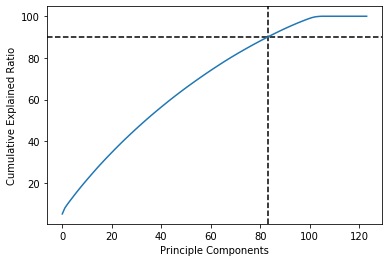

In [1346]:
#lets plot the graph for graphical understanding
plt.ylabel('Cumulative Explained Ratio')
plt.xlabel('Principle Components')

plt.axvline(x = s, color = 'k', linestyle = '--')
plt.axhline(y = 90, color = 'k', linestyle = '--')

plt.plot(cum_score)
plt.show()

From the above plot we can see that for 84 columns 90% of data will be retrived

In [1347]:
#lets perform the PCA with 82 columns
Final_pca = PCA(n_components= 84)

pca_x = pd.DataFrame(Final_pca.fit_transform(scaled_X))

In [1348]:
#lets create a datafram
pca_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83
0,-0.542227,1.542814,1.029793,3.114910,0.032700,-1.616588,-0.905549,1.912103,0.118120,-2.417596,-0.490291,0.368104,1.101160,-1.566471,-0.006389,1.070472,0.208190,0.249277,-0.345779,0.297898,2.059129,-0.576674,-1.867076,-1.403512,-0.777933,-0.603375,-0.472087,-0.012039,-2.032491,0.293980,-1.380910,-0.611133,1.274999,-1.485441,1.770561,0.146925,-0.833926,-0.991173,-0.674470,1.728128,-2.476333,0.682930,0.103799,0.010829,1.091399,1.172902,0.302453,-2.510527,0.821354,0.277899,-0.929133,-1.471006,-0.011353,0.169595,-0.203648,-0.217892,0.774554,-0.144988,0.070756,-1.397883,-1.957609,0.861856,-0.180150,0.626692,-0.527357,-1.649406,-0.842962,0.362562,0.526608,0.634293,1.251896,-0.754561,-0.563516,-0.536519,-1.197826,0.680249,-0.752701,-1.349672,-1.225335,-0.193082,-0.793529,0.184205,0.009710,0.669435
1,3.519726,0.195839,0.871978,-0.967905,-0.416523,-1.804933,0.044002,-0.516367,-1.357826,2.053044,-0.629356,2.496463,-1.235898,0.770735,-0.023508,0.973005,0.360094,-0.130478,1.567034,0.056283,0.630882,0.439712,-0.159726,1.268762,-2.083694,-0.669961,-1.051449,0.363016,1.974711,0.049913,1.572628,-0.460069,0.361609,1.260917,-1.058566,-1.252384,1.936824,-0.070501,-1.205497,0.246031,-0.057511,0.047590,0.032292,-1.840368,0.461346,0.256773,0.219795,-1.695211,1.570720,0.137962,-1.171691,-1.485209,0.706583,1.625767,-0.199110,-1.020032,-0.659073,2.354831,-0.478621,-1.853618,-2.239970,1.077020,0.341893,-0.060537,-1.184734,0.771256,1.159991,-0.624942,0.544713,0.352326,0.642523,-0.012250,1.543159,0.422393,-0.698853,0.415999,-0.661381,-0.319009,-0.430147,0.125577,2.115326,-0.483753,-0.032035,-1.322652
2,-0.130645,-2.433443,-0.189314,0.329247,-0.756039,-0.556727,-0.008944,-0.707403,-0.922020,0.644088,0.461447,-1.114809,1.210874,2.266650,0.052730,-2.577675,-0.622535,-0.894619,-0.454927,-1.065768,1.477663,2.037894,-1.133091,1.876371,0.219681,-3.658709,0.260546,-0.185022,0.973104,-0.778036,-1.210119,-0.072079,1.658605,-2.171312,0.228899,0.967298,-0.050373,-1.763719,-0.788998,0.684784,0.100750,0.207861,-1.189245,0.384476,-0.679322,-1.050635,-0.117562,1.040920,0.519207,0.684941,-0.804210,-0.620351,-0.164363,-0.135748,-0.133512,2.319880,1.505739,0.195261,0.116664,-0.632663,1.209071,-0.059942,-0.332417,0.181711,0.524511,0.738412,0.018998,0.184308,-0.342201,-2.191911,-0.752438,-1.935675,0.273073,0.206960,-0.726589,-1.524181,0.814664,-0.117290,-0.024712,1.143365,1.137855,-0.413325,-0.320048,-0.524209
3,-0.390091,1.764960,0.496338,0.951910,-2.392263,-2.498604,-1.489218,1.202809,0.122628,-1.638977,-0.081671,-3.547167,-2.361815,0.406879,1.152247,-0.119778,-0.987389,3.356638,0.190844,-2.068076,-0.840089,1.905977,-1.061301,-0.163314,1.368479,-1.576594,-2.509986,-2.062965,0.300064,0.048994,3.228559,-0.684030,0.532075,0.409890,0.098306,0.720108,-0.905815,0.462375,0.156605,2.137545,0.595490,0.026529,-0.142408,1.804656,1.044536,-0.913404,-0.389439,1.588208,-0.302238,0.434469,-1.862688,0.096736,1.430708,0.501605,-0.899748,0.526843,-0.682558,0.303242,1.847089,0.603390,-0.077614,-1.408141,-0.781622,-1.247359,0.045577,-0.073447,-1.669553,0.374117,1.030587,1.018893,-0.812508,-1.379310,1.487726,2.530821,0.869200,-0.681187,1.040755,0.502785,-1.846260,-0.241989,0.078347,0.442563,-0.981529,-0.438229
4,4.816929,-0.428713,1.823974,-0.848970,-1.204681,0.760340,-0.561371,1.169826,-0.290582,2.441837,-0.158892,-0.517504,-0.118921,-0.009006,1.727243,-0.713689,-0.400468,1.366887,-1.485650,-1.830425,-0.233559,0.203560,0.659203,0.957276,1.125783,-2.169724,-1.230467,1.556245,0.314714,0.768820,-1.148250,0.051113,-0.634114,0.358256,-0.856517,1.205477,1.163037,0.675789,1.591833,3.086914,1.379499,0.145152,0.840035,1.439058,-0.090080,0.196883,0.338348,0.752345,-0.208024,-0.323171,0.802109,0.396534,2.043231,0.515374,0.339736,0.829534,0.082218,-0.126766,-2.3697

## Handling class Imbalance problem using SMOT method

In [1349]:
#we already saw the class imbalance problem in this dataset
Y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [1350]:
#To install imbalanced-learn library use "pip install imbalanced-learn" command
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(pca_x, Y)

y_sm.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

In [1351]:
#now our class imbalnace problem is sloved

## Lets Check for Best Random State

In [1352]:
maxaccu = 0
rand_state = 0
for i in range(42,100):

    x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=.22,random_state= i,stratify= y_sm )
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxaccu:
        maxaccu = acc
        rand_state = i
print('Best accuracy is {} on random state {}'.format(maxaccu,rand_state))

Best accuracy is 0.9156626506024096 on random state 64


In [1353]:
print('We got our best randoms sate as :',rand_state)

We got our best randoms sate as : 64


In [1354]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=.22,random_state= rand_state, stratify= y_sm )

In [1355]:
#now we don't have the class imbalance problem
y_train.value_counts()

1    587
0    587
Name: fraud_reported, dtype: int64

## Model selection:

In [1356]:
#lets Choose Among these Models
lg = LogisticRegression()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
#ensemble technique
rf = RandomForestClassifier()
ada = AdaBoostClassifier()

In [1357]:
model_list = [lg,dtc,knn,rf,ada]
least_diffrence = []
for m in model_list:
    print('\n')
    print(m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    accu = accuracy_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('The accuracy of {} is {}'.format(m,accu))
    cv = cross_val_score(m,x_sm,y_sm,cv =5)
    print("cross val score :",  cv.mean())
    diffrence = np.abs(accuracy_score(y_test,pred) - cv.mean())
    a = 'diffrence b/w accurancy score and cross val score is : {:.2f}'.format(diffrence)
    print(a)
    least_diffrence.append((m,a))
    for i in ([0,1]):
        f1 = f1_score(y_test,pred,pos_label=i)
        print("f1 score for {} is {} ".format(i,f1))



LogisticRegression()
[[149  17]
 [ 11 155]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       166
           1       0.90      0.93      0.92       166

    accuracy                           0.92       332
   macro avg       0.92      0.92      0.92       332
weighted avg       0.92      0.92      0.92       332

The accuracy of LogisticRegression() is 0.9156626506024096
cross val score : 0.8871333964049196
diffrence b/w accurancy score and cross val score is : 0.03
f1 score for 0 is 0.9141104294478528 
f1 score for 1 is 0.9171597633136095 


DecisionTreeClassifier()
[[124  42]
 [ 28 138]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       166
           1       0.77      0.83      0.80       166

    accuracy                           0.79       332
   macro avg       0.79      0.79      0.79       332
weighted avg       0.79      0.79      0.79       332

The accuracy of De

In [1358]:
#Lets check the least difference between cross val score and Accuracy score
least_diffrence

[(LogisticRegression(),
  'diffrence b/w accurancy score and cross val score is : 0.03'),
 (DecisionTreeClassifier(),
  'diffrence b/w accurancy score and cross val score is : 0.01'),
 (KNeighborsClassifier(),
  'diffrence b/w accurancy score and cross val score is : 0.02'),
 (RandomForestClassifier(),
  'diffrence b/w accurancy score and cross val score is : 0.00'),
 (AdaBoostClassifier(),
  'diffrence b/w accurancy score and cross val score is : 0.03')]

In [1359]:
#since random fores ishaving diffrence of 0.00 which is very close,so there is no overfitting in this model
#Lets choose model with most accuracy
#Random forest is having hishest accurancy of 93%
#so lets choose random forest as our final model

In [1362]:
#we can see that there no differnec between cross val score and accurancy score for random forest
least_diffrence[3]

(RandomForestClassifier(),
 'diffrence b/w accurancy score and cross val score is : 0.00')

## Hyperparameter Tuning:

In [1363]:
#lets create the parameter list to pass in Randomised seracgh cv
parameters = {'n_estimators':[100,200,300,400,500,600,700,800],'criterion' : ['gini','entropy'] ,'max_depth' : [3,4,5,6,7,8,10,25]
             ,'min_samples_split':[2,5,8,10,12,18],'max_features':['auto','sqrt'],'min_samples_leaf':[1,3,5,7,9]}

In [1364]:
#using randomised search CV
gsv = RandomizedSearchCV(estimator= rf , param_distributions=parameters,cv =5)
gsv.fit(x_train,y_train) 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 7, 9],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              18],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800]})

In [1365]:
 param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 7, 9],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              18],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800]}

In [1366]:
gsv.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini'}

In [1367]:
#We got our best parameters after Hyperparameter tuning

best_params = {'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 25,
 'criterion': 'gini'}

## Creating a Final Model as Random Forest Classifier

In [1368]:
final_model = RandomForestClassifier(n_estimators= 500,criterion='gini',max_depth=25,max_features='sqrt',min_samples_leaf=3,min_samples_split=5)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
accu =accuracy_score(y_test,pred)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('The accuracy of {} is {}'.format(final_model,accu))
cv = cross_val_score(final_model,x_sm,y_sm,cv =5)
print('\n')
print("cross val score :",  cv.mean())
diffrence = np.abs(accuracy_score(y_test,pred) - cv.mean())
least_diffrence.append((final_model,diffrence))
print('\n')
print('diffrence b/w accurancy score and cross val score is :',diffrence)
for i in ([0,1]):
    f1 = f1_score(y_test,pred,pos_label=i)
    print("f1 score for {} is {} ".format(i,f1))

[[155  11]
 [ 11 155]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       166
           1       0.93      0.93      0.93       166

    accuracy                           0.93       332
   macro avg       0.93      0.93      0.93       332
weighted avg       0.93      0.93      0.93       332

The accuracy of RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=5, n_estimators=500) is 0.9337349397590361


cross val score : 0.932302919627731


diffrence b/w accurancy score and cross val score is : 0.0014320201313050562
f1 score for 0 is 0.9337349397590361 
f1 score for 1 is 0.9337349397590361 


Now our score incresed by 94% after hyperparameter Tuning with 0.016% differnec between cross vals score

## Saving the model:

In [1369]:
#serialization using joblib
import joblib
joblib.dump(final_model,'Fraud_Insurance.obj')

['Fraud_Insurance.obj']

In [1370]:
Fraud_Insurance = joblib.load('Fraud_Insurance.obj')

In [1371]:
accuracy_score(Fraud_Insurance.predict(x_test),y_test)

0.9337349397590361

We have accuracy score of 94% percent

## AUC ROC curve :

In [1372]:
#Since we have Random forest classifer as our final , lets check out the auc roc curve and score

In [1373]:
final_model.score(x_train,y_train)

1.0

In [1374]:
y_pred_prob = final_model.predict_proba(x_test)[:,1]

In [1375]:
#lets calculate fpr,tpr for plotting the roc-auc curve
fpr,tpr,thresholds  = roc_curve(y_test,y_pred_prob)

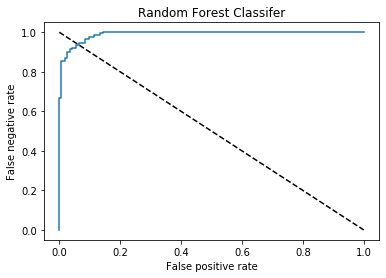

In [1376]:
#Roc-AUC curve plot
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'Random Forest Classifer')
plt.xlabel('False positive rate')
plt.ylabel('False negative rate')
plt.title('Random Forest Classifer')
plt.show()

In [1377]:
#Auc Roc curve is the graphical representation of confution matrix

In [1378]:
#roc auc score
roc_auc_score(pred,y_test)

0.9337349397590361

## Conclusion

In [1379]:
#lets make a dataframe of actual answers vs predicted answers
conclusion = pd.DataFrame((Fraud_Insurance.predict(x_test)[:],y_test[:]),index= ['Predicted','Actual'])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331
Predicted,0,0,0,1,0,1,1,0,1,1,0,0,0,1,0,0,1,1,1,0,0,1,0,1,1,0,1,1,0,0,1,0,1,1,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,1,0,1,1,0,0,1,0,1,1,1,1,0,0,0,1,0,1,1,1,1,0,0,1,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,1,1,0,0,0,1,0,1,1,0,0,1,0,1,0,1,1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,0,1,1,1,0,0,1,1,0,1,0,1,1,1,1,1,1,1,0,1,0,0,1,0,1,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,1,1,1,1,0,0,1,1,1,0,1,1,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,1,0,1,0,1
Actual,0,0,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,1,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,1,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,1,0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,1,0,1,1,1,1,0,0,0,1,0,1,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1,1,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,1,1,1,0,0,1,1,0,1,0,1,1,1,1,1,1,1,0,1,0,0,1,0,1,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1


94% of our answers are correct and also model is not overfitted